In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf

In [29]:
# Load dataset
file_path = '/Users/harshmahadik/Downloads/SEM VII/DL/Dataset/Bike Sales Dashboard.xlsx'
sheet_name = 'bike_buyers'
df = pd.read_excel(file_path, sheet_name=sheet_name)

In [30]:
# Set ID as the index
df.set_index('ID', inplace=True)

In [31]:
for col in df.columns:
    print(f'{col}: {df[col].unique()}')

Martial Status: ['Married' 'Single']
Gender: ['Female' 'Male']
Income: [ 40000  30000  80000  70000  10000 160000  20000 120000  90000 170000
  60000 100000 130000 150000  50000 110000]
Children: [1 3 5 0 2 4]
Education: ['Bachelors' 'Partial College' 'High School' 'Partial High School'
 'Graduate Degree']
Occupation: ['Skilled Manual' 'Clerical' 'Professional' 'Manual' 'Management']
Home Owner: ['Yes' 'No']
Cars: [0 1 2 4 3]
Commute Distance: ['0-1 Miles' '2-5 Miles' '5-10 Miles' '1-2 Miles' 'More than 10 Miles']
Region: ['Europe' 'Pacific' 'North America']
Age: [42 43 60 41 36 50 33 58 40 54 55 35 45 38 59 47 56 34 63 29 44 32 26 31
 62 30 28 65 48 66 46 52 39 61 37 68 51 25 49 53 27 67 57 70 78 69 64 89
 80 73 74 71 72]
Age Brackets: ['Middle Age' 'Old' 'Adolescent']
Purchased Bike: ['No' 'Yes']


In [32]:
# Map ordinal values to numerical values
df['Occupation'] = df['Occupation'].map({
    'Clerical': 0, 'Manual': 1, 'Skilled Manual': 2, 'Management': 3, 'Professional': 4
})
df['Education'] = df['Education'].map({
    'Partial High School': 0, 'High School': 1, 'Partial College': 2, 'Bachelors': 3, 'Graduate Degree': 4
})
df['Commute Distance'] = df['Commute Distance'].map({
    '0-1 Miles': 0, '1-2 Miles': 1, '2-5 Miles': 2, '5-10 Miles': 3, 'More than 10 Miles': 4
})
df['Age Brackets'] = df['Age Brackets'].map({
    'Middle Age': 1, 'Old': 2, 'Adolescent': 0
})

# Label encoding for categorical features
labelencoder = LabelEncoder()
df['Martial Status'] = labelencoder.fit_transform(df['Martial Status'])
df['Gender'] = labelencoder.fit_transform(df['Gender'])
df['Home Owner'] = labelencoder.fit_transform(df['Home Owner'])
df['Region'] = labelencoder.fit_transform(df['Region'])
df['Purchased Bike'] = labelencoder.fit_transform(df['Purchased Bike'])

# Label encoding for categorical features
labelencoder = LabelEncoder()
df['Martial Status'] = labelencoder.fit_transform(df['Martial Status'])
df['Gender'] = labelencoder.fit_transform(df['Gender'])
df['Home Owner'] = labelencoder.fit_transform(df['Home Owner'])
df['Region'] = labelencoder.fit_transform(df['Region'])
df['Purchased Bike'] = labelencoder.fit_transform(df['Purchased Bike'])

In [33]:
for col in df.columns:
    print(f'{col}: {df[col].unique()}')

Martial Status: [0 1]
Gender: [0 1]
Income: [ 40000  30000  80000  70000  10000 160000  20000 120000  90000 170000
  60000 100000 130000 150000  50000 110000]
Children: [1 3 5 0 2 4]
Education: [3 2 1 0 4]
Occupation: [2 0 4 1 3]
Home Owner: [1 0]
Cars: [0 1 2 4 3]
Commute Distance: [0 2 3 1 4]
Region: [0 2 1]
Age: [42 43 60 41 36 50 33 58 40 54 55 35 45 38 59 47 56 34 63 29 44 32 26 31
 62 30 28 65 48 66 46 52 39 61 37 68 51 25 49 53 27 67 57 70 78 69 64 89
 80 73 74 71 72]
Age Brackets: [1 2 0]
Purchased Bike: [0 1]


In [34]:
# Drop the Age column as it has been replaced by Age Brackets
df.drop('Age', axis=1, inplace=True)

In [35]:
# Train-test split
X = df.drop('Purchased Bike', axis=1)
y = df['Purchased Bike']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
# Build the ANN model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
# Compile the model with a standard learning rate
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [39]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, verbose=1, validation_data=(X_test, y_test))

Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5165 - loss: 0.7082 - val_accuracy: 0.5250 - val_loss: 0.6828
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 911us/step - accuracy: 0.5569 - loss: 0.6802 - val_accuracy: 0.5750 - val_loss: 0.6793
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - accuracy: 0.6252 - loss: 0.6590 - val_accuracy: 0.5700 - val_loss: 0.6766
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 817us/step - accuracy: 0.6293 - loss: 0.6506 - val_accuracy: 0.5800 - val_loss: 0.6784
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 824us/step - accuracy: 0.6393 - loss: 0.6428 - val_accuracy: 0.5650 - val_loss: 0.6820
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - accuracy: 0.6678 - loss: 0.6182 - val_accuracy: 0.5750 - val_loss: 0.6854
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step - accuracy: 0.7054 - loss: 0.6060 - val_accuracy: 0.5750 - val_loss: 0.6893
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6998 - loss: 0.6047 - val_accuracy: 0.5700

In [40]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Accuracy: {accuracy*100:.2f}%')

Accuracy: 60.50%


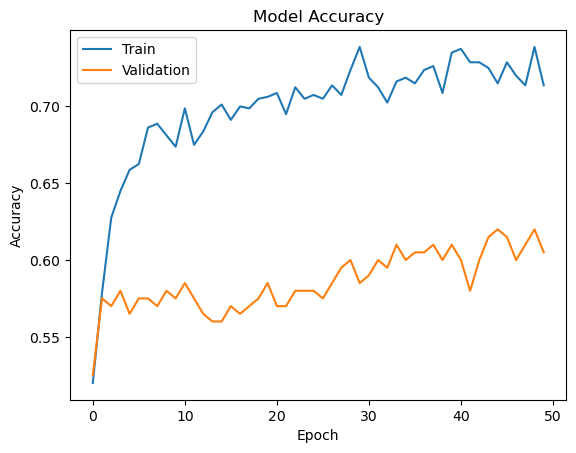

In [41]:
# Plot the accuracy curve
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

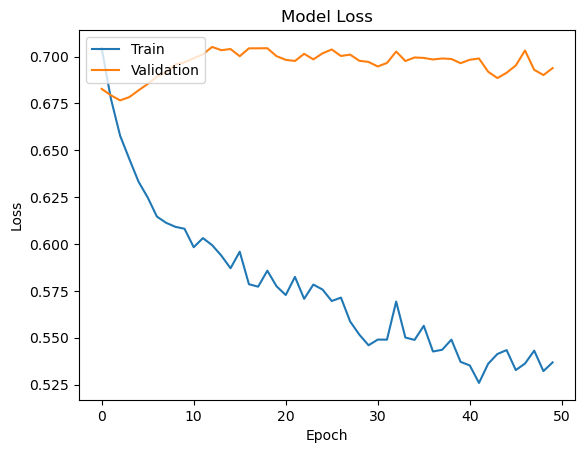

In [42]:
# Plot the loss curve
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()